In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore') 

# Reading The data

In [2]:
df = pd.read_csv('.\chronic_kidney_disease.csv')

# Analyzing the data

In [3]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    object 
 1   bp      400 non-null    object 
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    object 
 10  bu      400 non-null    object 
 11  sc      400 non-null    object 
 12  sod     400 non-null    object 
 13  pot     400 non-null    object 
 14  hemo    400 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

# Database loading and pre-processing

In [5]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

#initialise variable with dataset name
dataset_name = '.\chronic_kidney_disease.csv'

#error-handling to prevent abnormal termination of code
try:
    #import and load weather dataset into pandas dataframe
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(chronic_kidney_disease_dataframe)
    #Missing value imputation
    #replace ? to nan values 
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
    
    
    #set the features and the target variables
    target_class = chronic_kidney_disease_dataframe['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = chronic_kidney_disease_dataframe.iloc[:, 0:24]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
    # replacing the null values
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    #target_class1 = pd.DataFrame(target_class, columns=['class'])
    
    X=feature_classes
    y=target_class
    
    #split the dataset into training and testing data using K Fold Approach
    kf = StratifiedKFold(n_splits=5, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
        
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(X_train.shape[0]))
    print('Size of test dataset: ' + str(y_test.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
p

# Converting each column to float data type

In [6]:
# taking the length of the column and converting the each column to float
colLength = (len(chronic_kidney_disease_dataframe.axes[1]))

# for storing the position of each column
count=0;

for i in chronic_kidney_disease_dataframe:
    count += 1
    # the last column of the data set is label so when we reach last column just break the loop
    if(count==25):
        break
    
    # converting each column to float data type
    
    chronic_kidney_disease_dataframe[i] = chronic_kidney_disease_dataframe[i].astype('float64')

In [7]:
chronic_kidney_disease_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

In [8]:
chronic_kidney_disease_dataframe['class'].value_counts()
chronic_kidney_disease_dataframe['class'] = chronic_kidney_disease_dataframe['class'].replace(to_replace={'ckd\t':'ckd'})
chronic_kidney_disease_dataframe["class"] = [1 if i == "ckd" else 0 for i in chronic_kidney_disease_dataframe["class"]]
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

# Filling empty cell or null values with median

In [9]:
for feature in features:
    chronic_kidney_disease_dataframe[feature] = chronic_kidney_disease_dataframe[feature].fillna(chronic_kidney_disease_dataframe[feature].median())

# Checking For Null Values

In [10]:
chronic_kidney_disease_dataframe.isnull().any().sum()

0

# Mutual Information Feature Selection

In [11]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.10136935, 0.12413029, 0.35716715, 0.36255125, 0.08124922,
       0.04612049, 0.11732081, 0.00140554, 0.01361606, 0.15056932,
       0.16745627, 0.34069904, 0.26431194, 0.17628523, 0.42202255,
       0.429459  , 0.13482137, 0.38369225, 0.15361445, 0.19924519,
       0.04758488, 0.09511483, 0.10445831, 0.07401144])

In [12]:
# converting to pandas series
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

pcv      0.429459
hemo     0.422023
rbcc     0.383692
al       0.362551
sg       0.357167
sc       0.340699
sod      0.264312
dm       0.199245
pot      0.176285
bu       0.167456
htn      0.153614
bgr      0.150569
wbcc     0.134821
bp       0.124130
pc       0.117321
pe       0.104458
age      0.101369
appet    0.095115
su       0.081249
ane      0.074011
cad      0.047585
rbc      0.046120
ba       0.013616
pcc      0.001406
dtype: float64

<AxesSubplot: xlabel='Features', ylabel='mutual_info'>

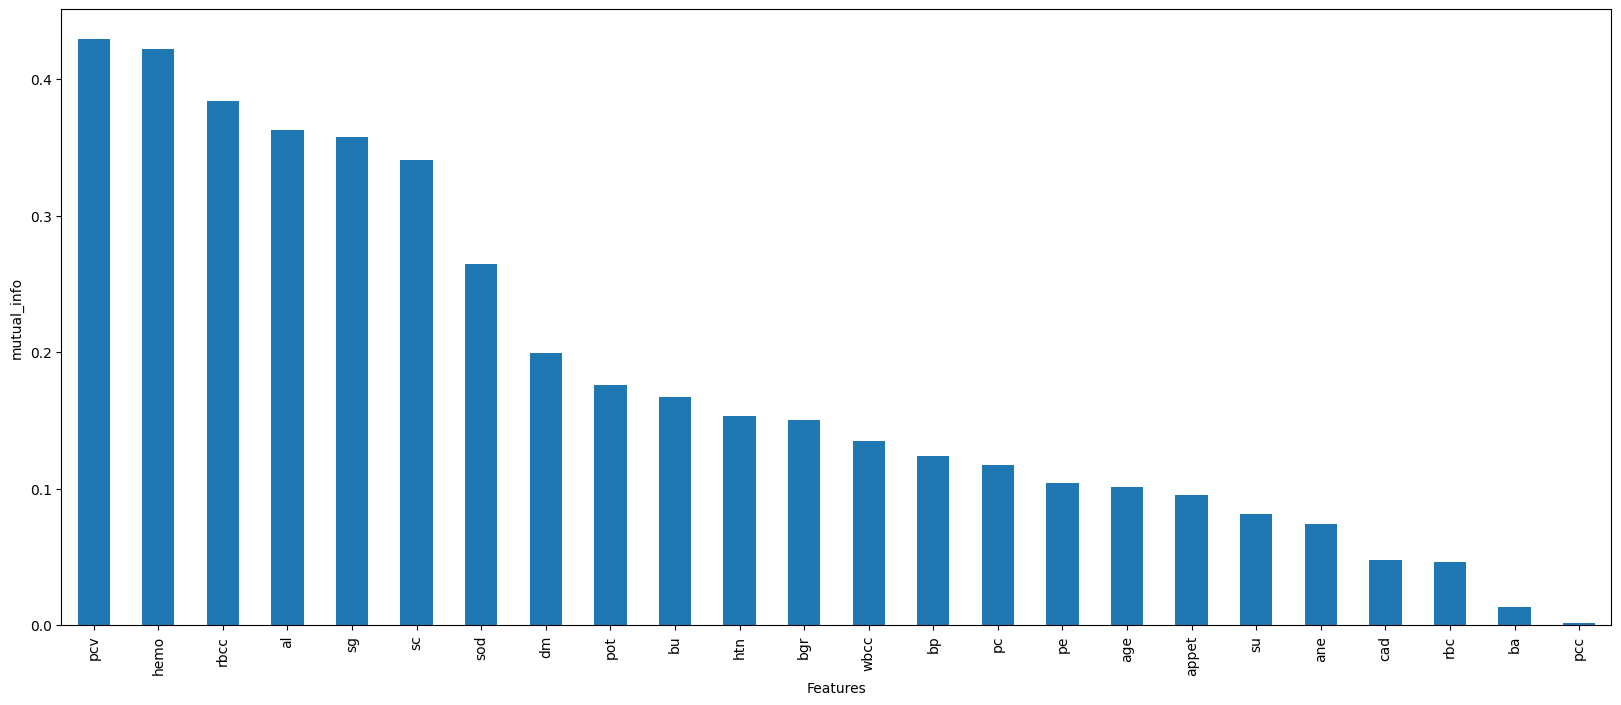

In [13]:
mutual_info.sort_values(ascending=False).plot.bar(xlabel="Features",ylabel="mutual_info",figsize=(20, 8))

In [14]:
# Independent and Dependent Feature:
X = chronic_kidney_disease_dataframe.iloc[:, :-1]
y = chronic_kidney_disease_dataframe.iloc[:, -1]

# Function for calling different classifier and splitting of dataset into traning and testing and selecting the best feature from the Mutual Information

In [15]:
# selecting the top feature
from sklearn.feature_selection import SelectKBest
def selectFeature(n):
    sel_five_cols = SelectKBest(mutual_info_classif, k=n)
    sel_five_cols.fit(X_train, y_train)
    return X_train.columns[sel_five_cols.get_support()]

# for selecting all the details of the dataset based on the selected top feature
# chronic_kidney_disease_dataframe[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
dataset=[]
def topFeature(feature):
    dataset=[]
    topFeature = []
    for i in feature:
        topFeature.append(i)
    dataset.append(topFeature)
    return dataset

# the classifier function

# calling classifier
def classifierUsed(selectedDataSetForTraining,feature,number):
    
    randomForestClassifier(selectedDataSetForTraining,feature,number)
    decisionTreeClassifier(selectedDataSetForTraining,feature,number)
    KNNClassifier(selectedDataSetForTraining,feature,number)
    logisticRegressionClassifier(selectedDataSetForTraining,feature,number)
    supportVectorMachineClassifier(selectedDataSetForTraining,feature,number)
    
    
# function for random forest classifiers
def numberOfFeatureForClassifier(number):
    selectedFeature = selectFeature(number)
    feature =[]
    for i in selectedFeature:
        # appending the selected feature into a list
        feature.append(i)

    selectedDataSetForTraining = topFeature(feature)
    
    # calling the classifier function
    classifierUsed(selectedDataSetForTraining,feature,number)
    
n_Featurelist = []            # To store no of features

# Format: list = [[Accuracy scores],[Percision scores],[F1 scores],[Recall scores]]

rf_list = [[],[],[],[]]       # To store rf performance
dt_list = [[],[],[],[]]       # To store dt performance
lr_list = [[],[],[],[]]       # To store lr performance
knn_list = [[],[],[],[]]      # To store knn performance
svm_list = [[],[],[],[]]      # To store svm performance

 # Random Forest Classifier

In [16]:
# Random Forest classifier function
from sklearn.ensemble import RandomForestClassifier

def randomForestClassifier(selectedDataSetForTraining,feature,number):
    
    # printing the top feature
    print("Using Random Forest Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5  
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

    
    # RandomForestClassifier:
    RandomForest = RandomForestClassifier()
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=RandomForest,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)
    
    # Appending no of features to Feature list 
    n_Featurelist.append(str(number))
    
    # Appending avg accuracy to list 
    rf_list[0].append(avg_Accuracy)
    
    print('Accuracy list {} & No of Feature list {}'.format(rf_list[0],n_Featurelist))
    
    RandomForest = RandomForest.fit(X_train,y_train)
    
    # Predictions:
    y_pred=RandomForest.predict(X_test)

    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to list
    rf_list[1].append(precision_score)
    print('Precision list',rf_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    rf_list[2].append(f1_score)
    print('F1-score list',rf_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    rf_list[3].append(recall_score)
    print('Recall list',rf_list[3])
    
    print()
    
    print('\nClassification Report:\n',metrics.classification_report(y_test,y_pred))
    print("---------------------------------------------------------------------")
    print()

# Decision Tree Classifier

In [17]:
# Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier(selectedDataSetForTraining,feature,number):

     # printing the top feature
    print("Using Decision Tree Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
    
    
    # Decision Tree Classifier:
    decision_tree_model = DecisionTreeClassifier(random_state = 0)
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=decision_tree_model,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)
    
    # Appending avg accuracy to list
    dt_list[0].append(avg_Accuracy)
    print('Accuracy list',(dt_list[0]))
    
    decision_tree_model = decision_tree_model.fit(X_train,y_train)

    #DT predictions on test features
    y_pred = decision_tree_model.predict(X_test)
    
    # confusion matrix
    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to listv
    dt_list[1].append(precision_score)
    print('Precision list',dt_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    dt_list[2].append(f1_score)
    print('F1-score list',dt_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    dt_list[3].append(recall_score)
    print('Recall list',dt_list[3])
    
    print()
    
     #display classification report for Decision Tree
    print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))

    print("---------------------------------------------------------------------")
    print()


## KNN Classifier

In [18]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

def KNNClassifier(selectedDataSetForTraining,feature,number):

    print("Using KNN Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
    
    #KNN Classifier:
    KNN_classifier = KNeighborsClassifier(n_neighbors=5)
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=KNN_classifier,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)
    
    # Appending avg accuracy to list
    knn_list[0].append(avg_Accuracy)
    
    print('Accuracy list',(knn_list[0]))
    
    KNN_classifier = KNN_classifier.fit(X_train,y_train)

    #KNN predictions on test features
    y_pred = KNN_classifier.predict(X_test)
    
    # confusion matrix
    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to list
    knn_list[1].append(precision_score)
    print('Precision list',knn_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    knn_list[2].append(f1_score)
    print('F1-score list',knn_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    knn_list[3].append(recall_score)
    print('Recall list',knn_list[3])
    
    print()
    
     #display classification report for KNN
    print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))

    print("---------------------------------------------------------------------")
    print()

# Logistic Regression Classifier 

In [19]:
#Logistic Regression Classification
from sklearn.linear_model import LogisticRegression 

def logisticRegressionClassifier(selectedDataSetForTraining,feature,number):

    # printing the top feature
    print("Using Logistic Regression Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
        
    #Logistic Regression Classifier:    
    LR_classifier = LogisticRegression(random_state = 0)
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=LR_classifier,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)

    # Appending avg accuracy to list
    lr_list[0].append(avg_Accuracy)
    
    print('Accuracy list',(lr_list[0]))
    
    LR_classifier.fit(X_train,y_train)

    #LR predictions on test features
    y_pred = LR_classifier.predict(X_test)
    
    # confusion matrix
    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to list
    lr_list[1].append(precision_score)
    print('Precision list',lr_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    lr_list[2].append(f1_score)
    print('F1-score list',lr_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    lr_list[3].append(recall_score)
    print('Recall list',lr_list[3])
    print()
    
    #display classification report for LR
    print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))
    print("---------------------------------------------------------------------")
    print()

# Support Vector Machine Classifier

In [20]:
#Support vector machine
from sklearn.svm import SVC

def supportVectorMachineClassifier(selectedDataSetForTraining,feature,number):
    
    # printing the top feature
    print("Using Support vector machine Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()

    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
    
    # Support Vector Machine Classifier :
    
    SVM_classifier = support_vector_machine_model = SVC(random_state = 0)
        
    #running the model using scoring metric as accuracy
    kf_result=cross_val_score(estimator=SVM_classifier,X=X_train,y=y_train, cv=kf)
    print('Accuracy of {} fold - {}'.format(k,kf_result))
    
    # calculating the Average accuracy
    avg_Accuracy = (np.round(kf_result.mean(),4))*100
    print('Accuracy with k fold validation', avg_Accuracy)

    # Appending avg accuracy to list
    svm_list[0].append(avg_Accuracy)
    
    print('Accuracy list',(svm_list[0]))
    
    SVM_classifier.fit(X_train,y_train)

    #svm predictions on test features
    y_pred = SVM_classifier.predict(X_test)
    
    # confusion matrix
    print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
    print()
    
    #Performance
    # calculating the Precision score
    precision_score = round(metrics.precision_score(y_test,y_pred,average='macro'),2)
    print('\nPrecision :\n',precision_score)
    
    # Appending Precision score to list
    svm_list[1].append(precision_score)
    print('Precision list',svm_list[1])
    
    # calculating the F1 score
    f1_score = round(metrics.f1_score(y_test,y_pred,average='macro'),2)
    print('\nF1-score:\n',f1_score)
    
    # Appending F1 score to list
    svm_list[2].append(f1_score)
    print('F1-score list',svm_list[2])
    
    # calculating the Recall score
    recall_score = round(metrics.recall_score(y_test,y_pred,average='macro'),2)
    print('\nRecall:\n',recall_score)
    
    # Appending Recall to list
    svm_list[3].append(recall_score)
    print('Recall list',svm_list[3])
    
    print()
    
     #display classification report for SVM 
    print('\nClassification Report:\n' + str(metrics.classification_report(y_test, y_pred)))
    print("---------------------------------------------------------------------")
    print()

# CALLING THE MODEL

## No of features used: 4

In [21]:
numberOfFeatureForClassifier(4)

Using Random Forest Classification
The top 4 features are: 
['sc', 'hemo', 'pcv', 'rbcc']

Accuracy of 5 fold - [0.953125 0.875    0.953125 0.953125 0.9375  ]
Accuracy with k fold validation 93.44
Accuracy list [93.44] & No of Feature list ['4']

Confusion matrix:
 [[30  0]
 [ 2 48]]


Precision :
 0.97
Precision list [0.97]

F1-score:
 0.97
F1-score list [0.97]

Recall:
 0.98
Recall list [0.98]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

---------------------------------------------------------------------

Using Decision Tree Classification
The top 4 features are: 
['sc', 'hemo', 'pcv', 'rbcc']

Accuracy of 5 fold - [0.921875 0.890625 0.84375  0.890625 0.921875]
Accuracy with k fo

## No of features used: 5

In [22]:
numberOfFeatureForClassifier(5)

Using Random Forest Classification
The top 5 features are: 
['sg', 'sc', 'hemo', 'pcv', 'rbcc']

Accuracy of 5 fold - [0.96875  1.       0.984375 0.96875  0.96875 ]
Accuracy with k fold validation 97.81
Accuracy list [93.44, 97.81] & No of Feature list ['4', '5']

Confusion matrix:
 [[30  0]
 [ 1 49]]


Precision :
 0.98
Precision list [0.97, 0.98]

F1-score:
 0.99
F1-score list [0.97, 0.99]

Recall:
 0.99
Recall list [0.98, 0.99]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

---------------------------------------------------------------------

Using Decision Tree Classification
The top 5 features are: 
['sg', 'sc', 'hemo', 'pcv', 'rbcc']

Accuracy of 5 fold - [0.9375   0.96875  0.93

## No of features used: 6

In [23]:
numberOfFeatureForClassifier(6)

Using Random Forest Classification
The top 6 features are: 
['sg', 'al', 'sc', 'hemo', 'pcv', 'rbcc']

Accuracy of 5 fold - [0.984375 1.       0.984375 0.984375 0.984375]
Accuracy with k fold validation 98.75
Accuracy list [93.44, 97.81, 98.75] & No of Feature list ['4', '5', '6']

Confusion matrix:
 [[30  0]
 [ 0 50]]


Precision :
 1.0
Precision list [0.97, 0.98, 1.0]

F1-score:
 1.0
F1-score list [0.97, 0.99, 1.0]

Recall:
 1.0
Recall list [0.98, 0.99, 1.0]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

---------------------------------------------------------------------

Using Decision Tree Classification
The top 6 features are: 
['sg', 'al', 'sc', 'hemo', 'pcv', 'rbcc']

Accuracy

## No of features used: 7

In [24]:
numberOfFeatureForClassifier(7)

Using Random Forest Classification
The top 7 features are: 
['sg', 'al', 'sc', 'hemo', 'pcv', 'rbcc', 'htn']

Accuracy of 5 fold - [0.984375 1.       0.984375 0.984375 0.984375]
Accuracy with k fold validation 98.75
Accuracy list [93.44, 97.81, 98.75, 98.75] & No of Feature list ['4', '5', '6', '7']

Confusion matrix:
 [[30  0]
 [ 0 50]]


Precision :
 1.0
Precision list [0.97, 0.98, 1.0, 1.0]

F1-score:
 1.0
F1-score list [0.97, 0.99, 1.0, 1.0]

Recall:
 1.0
Recall list [0.98, 0.99, 1.0, 1.0]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

---------------------------------------------------------------------

Using Decision Tree Classification
The top 7 features are: 
['sg', 'al', 'sc'

## No of features used: 9

In [25]:
numberOfFeatureForClassifier(9)

Using Random Forest Classification
The top 9 features are: 
['sg', 'al', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'rbcc', 'htn']

Accuracy of 5 fold - [0.96875  1.       0.984375 0.984375 0.984375]
Accuracy with k fold validation 98.44000000000001
Accuracy list [93.44, 97.81, 98.75, 98.75, 98.44000000000001] & No of Feature list ['4', '5', '6', '7', '9']

Confusion matrix:
 [[30  0]
 [ 0 50]]


Precision :
 1.0
Precision list [0.97, 0.98, 1.0, 1.0, 1.0]

F1-score:
 1.0
F1-score list [0.97, 0.99, 1.0, 1.0, 1.0]

Recall:
 1.0
Recall list [0.98, 0.99, 1.0, 1.0, 1.0]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

---------------------------------------------------------------------

Using Decisio

## No of features used: 15

In [26]:
numberOfFeatureForClassifier(15)

Using Random Forest Classification
The top 15 features are: 
['bp', 'sg', 'al', 'pc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm']

Accuracy of 5 fold - [0.984375 1.       0.984375 0.96875  0.984375]
Accuracy with k fold validation 98.44000000000001
Accuracy list [93.44, 97.81, 98.75, 98.75, 98.44000000000001, 98.44000000000001] & No of Feature list ['4', '5', '6', '7', '9', '15']

Confusion matrix:
 [[30  0]
 [ 0 50]]


Precision :
 1.0
Precision list [0.97, 0.98, 1.0, 1.0, 1.0, 1.0]

F1-score:
 1.0
F1-score list [0.97, 0.99, 1.0, 1.0, 1.0, 1.0]

Recall:
 1.0
Recall list [0.98, 0.99, 1.0, 1.0, 1.0, 1.0]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

---

## No of features used: 18

In [27]:
numberOfFeatureForClassifier(18)

Using Random Forest Classification
The top 18 features are: 
['age', 'bp', 'sg', 'al', 'pc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'pe']

Accuracy of 5 fold - [0.984375 1.       0.984375 0.96875  0.984375]
Accuracy with k fold validation 98.44000000000001
Accuracy list [93.44, 97.81, 98.75, 98.75, 98.44000000000001, 98.44000000000001, 98.44000000000001] & No of Feature list ['4', '5', '6', '7', '9', '15', '18']

Confusion matrix:
 [[30  0]
 [ 0 50]]


Precision :
 1.0
Precision list [0.97, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0]

F1-score:
 1.0
F1-score list [0.97, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0]

Recall:
 1.0
Recall list [0.98, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00       

# MODEL EVALUATION

## Accuracy

In [28]:
# A dictionary which represents data
data_dict = { 'features': n_Featurelist,               #['4','5','6','7','9','15','18'],
              'rf': rf_list[0],                        #[93.40,96.60,98.40,97.80,99.10,98.80,98.40],
              'dt': dt_list[0],                        #[93.10,96.20,97.20,96.90,97.50,95.60,95.60],
              'lr': lr_list[0],                        #[91.60,91.10,94.70,96.20,96.20,96.20,95.00],
              'knn' :knn_list[0],                       #[93.40,92.80,96.20,93.40,93.80,72.80,72.80],
              'svm' :svm_list[0],                      #[92.20,92.80,95.00,93.40,93.80,67.80,67.80]
              }
  
# creating a data frame object
accuracy_matrix = pd.DataFrame(data_dict)
  
# show the dataframe
accuracy_matrix

,features,rf,dt,lr,knn,svm
0,4,93.44,89.38,95.31,93.12,94.06
1,5,97.81,95.31,95.31,93.12,93.75
2,6,98.75,97.50,96.88,92.81,93.75
3,7,98.75,96.88,95.94,92.81,93.75
4,9,98.44,96.88,95.62,92.81,85.62
5,15,98.44,96.25,94.06,72.81,67.81
6,18,98.44,95.31,95.31,72.19,67.81


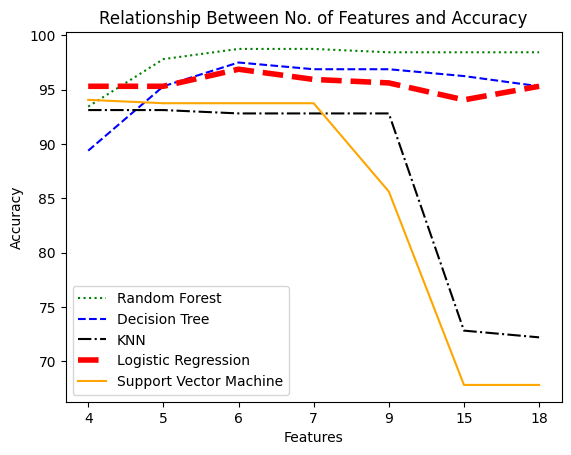

In [29]:
#Get current axis
ax = plt.gca()

# line plot for Random Forest
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'rf',label = "Random Forest",linestyle='dotted',color = 'green',ax = ax)

# line plot for Decision Tree
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'dt',label = "Decision Tree",linestyle='dashed',color = 'blue',ax = ax)

# line plot for KNN
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'knn',label = "KNN",linestyle='dashdot',color = 'black',ax = ax)

# line plot for Logistic Regression
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'lr',label = "Logistic Regression",linestyle='dashed',linewidth='4',color = 'red',ax = ax)

# line plot for SVM
accuracy_matrix.plot(kind = 'line',x = 'features',y = 'svm',label = "Support Vector Machine",linestyle='solid',color = 'orange',ax = ax)

# set the title
plt.title('Relationship Between No. of Features and Accuracy')

plt.xlabel('Features')
plt.ylabel('Accuracy')

# show the plot
plt.show()


## Precision

In [30]:
# A dictionary which represents data
data_dict = { 'features': n_Featurelist,               #['4','5','6','7','9','15','18'],
              'rf': rf_list[1],                        #[93.40,96.60,98.40,97.80,99.10,98.80,98.40],
              'dt': dt_list[1],                        #[93.10,96.20,97.20,96.90,97.50,95.60,95.60],
              'lr': lr_list[1],                        #[91.60,91.10,94.70,96.20,96.20,96.20,95.00],
              'knn' :knn_list[1],                       #[93.40,92.80,96.20,93.40,93.80,72.80,72.80],
              'svm' :svm_list[1],                      #[92.20,92.80,95.00,93.40,93.80,67.80,67.80]
              }
  
# creating a data frame object
precision_matrix = pd.DataFrame(data_dict)
  
# show the dataframe
precision_matrix

,features,rf,dt,lr,knn,svm
0,4,0.97,0.96,0.97,0.94,0.94
1,5,0.98,0.98,0.97,0.94,0.93
2,6,1.00,1.00,0.95,0.92,0.93
3,7,1.00,1.00,0.97,0.92,0.93
4,9,1.00,0.98,0.97,0.92,0.88
5,15,1.00,1.00,0.96,0.75,0.74
6,18,1.00,1.00,0.96,0.75,0.74


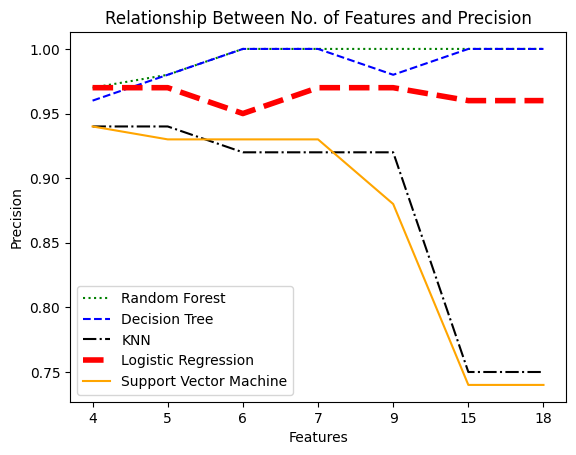

In [31]:
#Get current axis
ax = plt.gca()

# line plot for Random Forest
precision_matrix.plot(kind = 'line',x = 'features',y = 'rf',label = "Random Forest",linestyle='dotted',color = 'green',ax = ax)

# line plot for Decision Tree
precision_matrix.plot(kind = 'line',x = 'features',y = 'dt',label = "Decision Tree",linestyle='dashed',color = 'blue',ax = ax)

# line plot for KNN
precision_matrix.plot(kind = 'line',x = 'features',y = 'knn',label = "KNN",linestyle='dashdot',color = 'black',ax = ax)

# line plot for Logistic Regression
precision_matrix.plot(kind = 'line',x = 'features',y = 'lr',label = "Logistic Regression",linestyle='dashed',linewidth='4',color = 'red',ax = ax)

# line plot for SVM
precision_matrix.plot(kind = 'line',x = 'features',y = 'svm',label = "Support Vector Machine",linestyle='solid',color = 'orange',ax = ax)

# set the title
plt.title('Relationship Between No. of Features and Precision')

plt.xlabel('Features')
plt.ylabel('Precision')

# show the plot
plt.show()


## F1

In [32]:
# A dictionary which represents data
data_dict = { 'features': n_Featurelist,               #['4','5','6','7','9','15','18'],
              'rf': rf_list[2],                        #[93.40,96.60,98.40,97.80,99.10,98.80,98.40],
              'dt': dt_list[2],                        #[93.10,96.20,97.20,96.90,97.50,95.60,95.60],
              'lr': lr_list[2],                        #[91.60,91.10,94.70,96.20,96.20,96.20,95.00],
              'knn' :knn_list[2],                       #[93.40,92.80,96.20,93.40,93.80,72.80,72.80],
              'svm' :svm_list[2],                      #[92.20,92.80,95.00,93.40,93.80,67.80,67.80]
              }
  
# creating a data frame object
F1_matrix = pd.DataFrame(data_dict)
  
# show the dataframe
F1_matrix

,features,rf,dt,lr,knn,svm
0,4,0.97,0.96,0.97,0.95,0.95
1,5,0.99,0.99,0.97,0.95,0.94
2,6,1.00,1.00,0.96,0.92,0.94
3,7,1.00,1.00,0.97,0.92,0.94
4,9,1.00,0.99,0.97,0.92,0.89
5,15,1.00,1.00,0.96,0.72,0.69
6,18,1.00,1.00,0.96,0.72,0.69


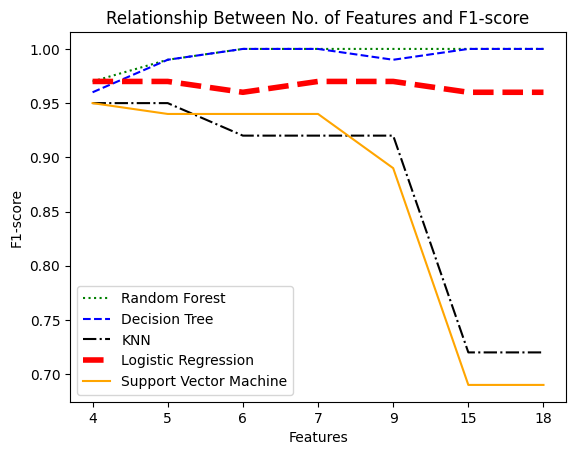

In [33]:
#Get current axis
ax = plt.gca()

# line plot for Random Forest
F1_matrix.plot(kind = 'line',x = 'features',y = 'rf',label = "Random Forest",linestyle='dotted',color = 'green',ax = ax)

# line plot for Decision Tree
F1_matrix.plot(kind = 'line',x = 'features',y = 'dt',label = "Decision Tree",linestyle='dashed',color = 'blue',ax = ax)

# line plot for KNN
F1_matrix.plot(kind = 'line',x = 'features',y = 'knn',label = "KNN",linestyle='dashdot',color = 'black',ax = ax)

# line plot for Logistic Regression
F1_matrix.plot(kind = 'line',x = 'features',y = 'lr',label = "Logistic Regression",linestyle='dashed',linewidth='4',color = 'red',ax = ax)

# line plot for SVM
F1_matrix.plot(kind = 'line',x = 'features',y = 'svm',label = "Support Vector Machine",linestyle='solid',color = 'orange',ax = ax)

# set the title
plt.title('Relationship Between No. of Features and F1-score')

plt.xlabel('Features')
plt.ylabel('F1-score')

# show the plot
plt.show()

## Recall

In [34]:
# A dictionary which represents data
data_dict = { 'features': n_Featurelist,               #['4','5','6','7','9','15','18'],
              'rf': rf_list[3],                        #[93.40,96.60,98.40,97.80,99.10,98.80,98.40],
              'dt': dt_list[3],                        #[93.10,96.20,97.20,96.90,97.50,95.60,95.60],
              'lr': lr_list[3],                        #[91.60,91.10,94.70,96.20,96.20,96.20,95.00],
              'knn' :knn_list[3],                       #[93.40,92.80,96.20,93.40,93.80,72.80,72.80],
              'svm' :svm_list[3],                      #[92.20,92.80,95.00,93.40,93.80,67.80,67.80]
              }
  
# creating a data frame object
recall_matrix = pd.DataFrame(data_dict)
  
# show the dataframe
recall_matrix

,features,rf,dt,lr,knn,svm
0,4,0.98,0.96,0.98,0.96,0.96
1,5,0.99,0.99,0.98,0.96,0.95
2,6,1.00,1.00,0.97,0.94,0.95
3,7,1.00,1.00,0.98,0.94,0.95
4,9,1.00,0.99,0.98,0.93,0.91
5,15,1.00,1.00,0.96,0.76,0.74
6,18,1.00,1.00,0.96,0.76,0.74


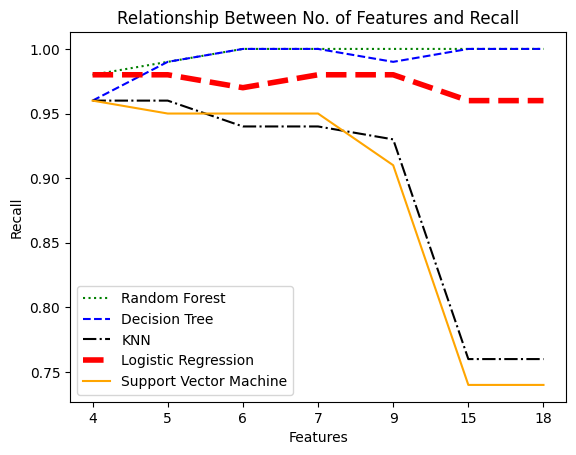

In [35]:
#Get current axis
ax = plt.gca()

# line plot for Random Forest
recall_matrix.plot(kind = 'line',x = 'features',y = 'rf',label = "Random Forest",linestyle='dotted',color = 'green',ax = ax)

# line plot for Decision Tree
recall_matrix.plot(kind = 'line',x = 'features',y = 'dt',label = "Decision Tree",linestyle='dashed',color = 'blue',ax = ax)

# line plot for KNN
recall_matrix.plot(kind = 'line',x = 'features',y = 'knn',label = "KNN",linestyle='dashdot',color = 'black',ax = ax)

# line plot for Logistic Regression
recall_matrix.plot(kind = 'line',x = 'features',y = 'lr',label = "Logistic Regression",linestyle='dashed',linewidth='4',color = 'red',ax = ax)

# line plot for SVM
recall_matrix.plot(kind = 'line',x = 'features',y = 'svm',label = "Support Vector Machine",linestyle='solid',color = 'orange',ax = ax)

# set the title
plt.title('Relationship Between No. of Features and Recall')

plt.xlabel('Features')
plt.ylabel('Recall')

# show the plot
plt.show()